In [7]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [9]:
x = torch.tensor([[x] for x in np.arange(0,10, 0.1)], dtype=torch.float32)
y = torch.tensor([[np.sin(x)] for x in np.arange(0,10, 0.1)], dtype=torch.float32)

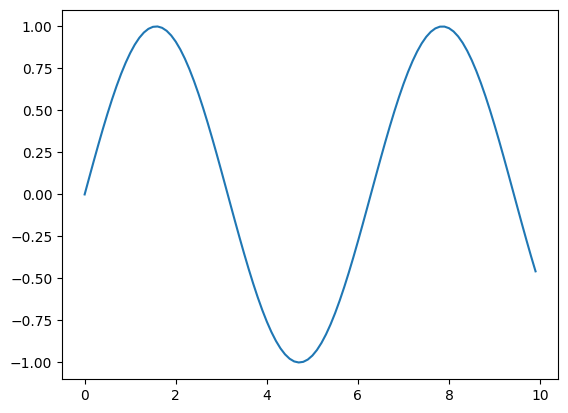

In [6]:
plt.plot(x, y)

In [8]:
# creating datasets and data loaders
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

In [10]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()

        self.linear_1 = nn.Linear(1, 100)
        self.linear_2 = nn.Linear(100, 1)
    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = self.linear_2(x)
        return x

In [11]:
model = NN()

In [12]:
losses = []
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()
for epoch in range(500):
    for batch in loader:
        X, y = [x for x in batch]

        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())


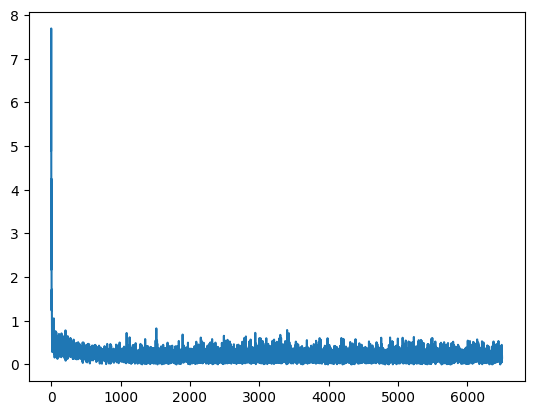

In [13]:
plt.plot(losses)

In [14]:
torch.rand((2,2))

tensor([[0.4877, 0.1222],
        [0.0184, 0.7289]])

In [27]:
w1 = torch.rand((3,1), dtype=torch.float32, requires_grad=True)
x = torch.tensor([[-1, -2, -3]], dtype=torch.float32, requires_grad=True)
b = torch.tensor([1], dtype=torch.float32, requires_grad=True)
output = x @ w1 + b
F.relu(output).backward()

In [28]:
w1.grad

tensor([[0.],
        [0.],
        [0.]])

In [ ]:
class NN(nn.Module):
    def __init__(self):
        self.params = nn.ParameterList()
        self.params.append(torch.rand((3,1), dtype=torch.float32, requires_grad=True))